# Arabic character classification with detection

here we are Implementing a CNN model for the classification and implementing a detection algorithm at the end.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sn

import keras
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



Using TensorFlow backend.


In [2]:
arabic_characters = ['alif','ba','ta','tsa','jim','hâ','khâ','dal','dzal',
                     'ra','zai','sîn','syîn','shâd','dhâd','thâ','zhâ','âin',
                     'ghain','fa','qâf','kâf','lam','mîm','nun','Ha','waw','yâ']


In [3]:
# loading the dataset


x_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv",header=None).to_numpy()
y_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv",header=None).to_numpy()-1 

x_test = pd.read_csv("/kaggle/input/ahcd1/csvTestImages 3360x1024.csv",header=None).to_numpy()
y_test = pd.read_csv("/kaggle/input/ahcd1/csvTestLabel 3360x1.csv",header=None).to_numpy()-1

print("x_train.shape =", x_train.shape, "\ny_train.shape =", y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440, 1) 
x_test.shape = (3360, 1024) 
y_test.shape = (3360, 1)


(13440, 32, 32, 1) (3360, 32, 32, 1)


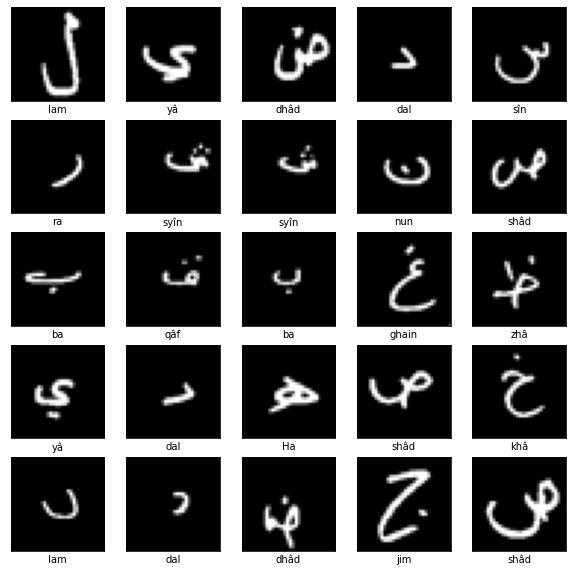

In [4]:
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])])
plt.show()


In [5]:
# Converting the class vector in integers to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)
for i in zip(y_train[0], arabic_characters):
    print(i)


(13440, 28) (3360, 28)
(1.0, 'alif')
(0.0, 'ba')
(0.0, 'ta')
(0.0, 'tsa')
(0.0, 'jim')
(0.0, 'hâ')
(0.0, 'khâ')
(0.0, 'dal')
(0.0, 'dzal')
(0.0, 'ra')
(0.0, 'zai')
(0.0, 'sîn')
(0.0, 'syîn')
(0.0, 'shâd')
(0.0, 'dhâd')
(0.0, 'thâ')
(0.0, 'zhâ')
(0.0, 'âin')
(0.0, 'ghain')
(0.0, 'fa')
(0.0, 'qâf')
(0.0, 'kâf')
(0.0, 'lam')
(0.0, 'mîm')
(0.0, 'nun')
(0.0, 'Ha')
(0.0, 'waw')
(0.0, 'yâ')


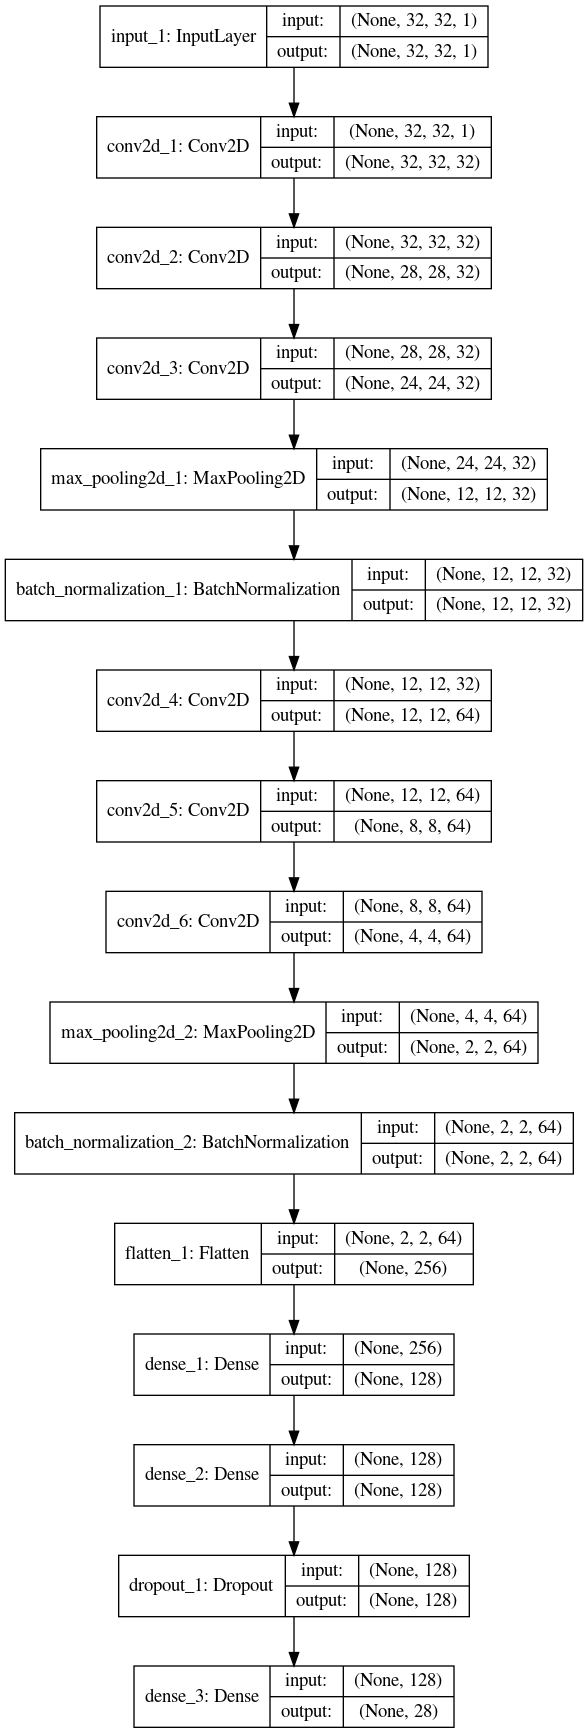

In [6]:
def get_model():
    In = Input(shape=(32,32,1))
    x = Conv2D(32, (5,5), padding="same", activation="relu")(In)
    x = Conv2D(32, (5,5), activation="relu")(x)
    x = Conv2D(32, (5,5), activation="relu")(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (5,5), padding="same", activation="relu")(x)
    x = Conv2D(64, (5,5), activation="relu")(x)
    x = Conv2D(64, (5,5), activation="relu")(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.4)(x)
    
    Out = Dense(28, activation="softmax")(x)
    
    model = Model(In, Out)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = get_model()
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [8]:
batch_size = 64
epochs = 50

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)


In [9]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])






Epoch 00001: val_accuracy improved from -inf to 0.10006, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.10006 to 0.50789, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.50789 to 0.78975, saving model to best.hdf5

Epoch 00004: val_accuracy did not improve from 0.78975

Epoch 00005: val_accuracy improved from 0.78975 to 0.86529, saving model to best.hdf5

Epoch 00006: val_accuracy did not improve from 0.86529

Epoch 00007: val_accuracy did not improve from 0.86529

Epoch 00008: val_accuracy improved from 0.86529 to 0.90777, saving model to best.hdf5

Epoch 00009: val_accuracy did not improve from 0.90777

Epoch 00010: val_accuracy did not improve from 0.90777

Epoch 00011: val_accuracy did not improve from 0.90777

Epoch 00012: val_accuracy improved from 0.90777 to 0.95146, saving model to best.hdf5

Epoch 00013: val_accuracy did not improve from 0.95146

Epoch 00014: val_accuracy did not improve from 0.95146

Epoch 00015: val_accuracy did no

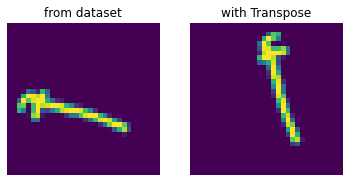

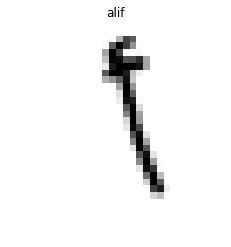

In [10]:
# we need to transpose the image for visualization
# since for training there is no problem we gave the data as it was
plt.figure()
plt.subplot(1,2,1)
plt.imshow(x_test[0].reshape(32,32))
plt.axis("off")
plt.title("from dataset")
plt.subplot(1,2,2)
plt.imshow(x_test[0].reshape(32,32).T)
plt.axis("off")
plt.title("with Transpose")
plt.show()

pred = model.predict([[x_test[0]]])
plt.imshow(x_test[0].reshape(32,32).T, "binary")
plt.title(arabic_characters[np.argmax(pred)])
plt.axis("OFF")
plt.show()

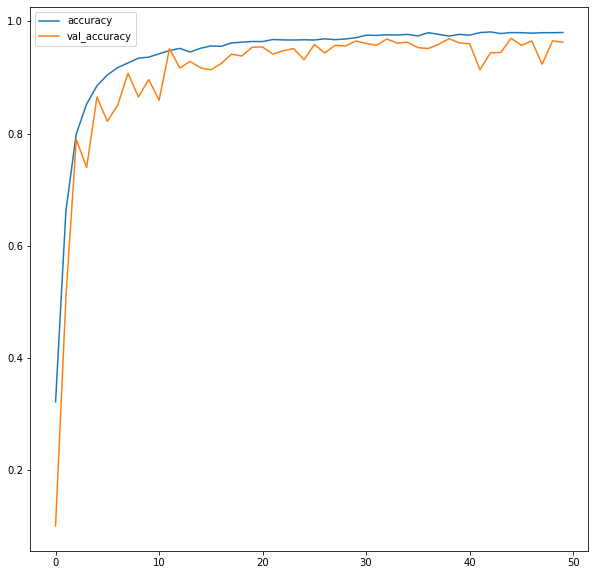

In [11]:
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

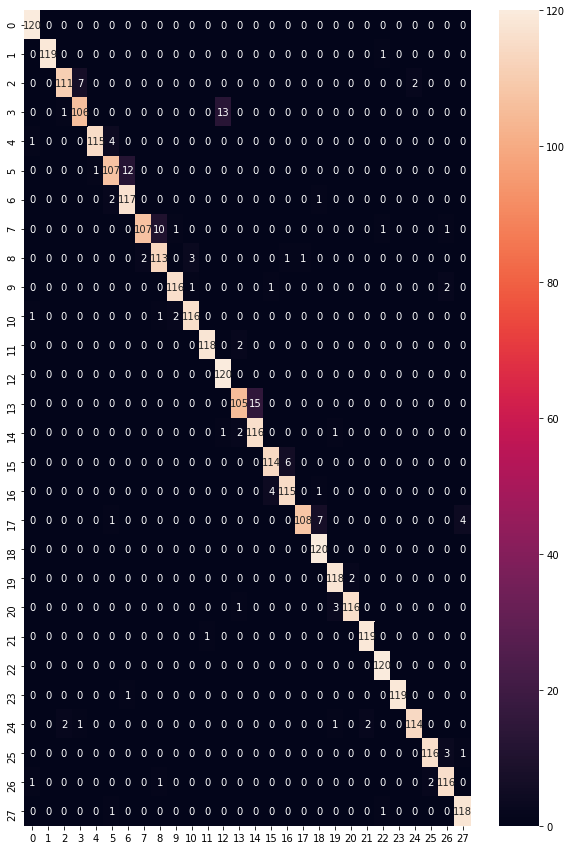

In [12]:

y_preds = model.predict(x_test)
y_pred_classes = np.argmax(y_preds, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,15))
sn.heatmap(cm, annot=True, fmt="d")

In [13]:
import cv2
def get_sides(length):
    if length%2==0:
        return length//2,length//2
    else:
        return (length-1)//2,1+(length-1)//2
    
    
def preprocess(character):
    if len(character.shape)<2:
        character = cv2.cvtColor(word, cv2.COLOR_BGR2GRAY)

    (wt, ht) = (32,32)
    (h, w) = character.shape
    fx = w / wt
    fy = h / ht
    f = max(fx, fy)
    newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) 
    character = cv2.resize(character, newSize)

    if character.shape[0] < 32:
        add_zeros_up = np.zeros((get_sides(32-character.shape[0])[0], character.shape[1]))
        add_zeros_down = np.zeros((get_sides(32-character.shape[0])[1], character.shape[1]))
        character = np.concatenate((add_zeros_up,character))
        character = np.concatenate((character, add_zeros_down))

    if character.shape[1] < 32:
        add_zeros_left = np.zeros((32, get_sides(32-character.shape[1])[0]))
        add_zeros_right = np.zeros((32, get_sides(32-character.shape[1])[1]))
        
        character = np.concatenate((add_zeros_left,character), axis=1)
        character = np.concatenate((character, add_zeros_right), axis=1)


    character= character.T/255.0
    character = np.expand_dims(character , axis = 2)
    return character

def get_characters(img,kv=5):
    gray = img.copy()

    kernel = np.ones((kv,kv),dtype=np.uint8)
    if len(img.shape)==3:
        gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
        
    _, thresh = cv2.threshold(gray,127,255, cv2.THRESH_BINARY_INV)
    imgdilation = cv2.dilate(thresh,kernel, iterations=1)
    ctrs, _= cv2.findContours(imgdilation.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs,key = lambda ctr: cv2.boundingRect(ctr)[0])
    sorted_ctrs = sorted_ctrs[::-1]
    characters=[]
    for ctr in sorted_ctrs:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(img[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        characters.append(acharacter)
    
    return characters,sorted_ctrs



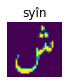

In [27]:
characters = get_characters(cv2.imread('/kaggle/input/test-aliflam/tes14.png',cv2.IMREAD_GRAYSCALE),30)[0]
characters=np.array(characters).reshape(-1,32,32,1)
preds = model.predict(characters)
for img, pred in zip(characters, preds):
    plt.figure(figsize=(1,1))
    plt.imshow(img.reshape(32,32).T)
    plt.title(arabic_characters[pred.argmax()])
    plt.axis('off')
    plt.show()

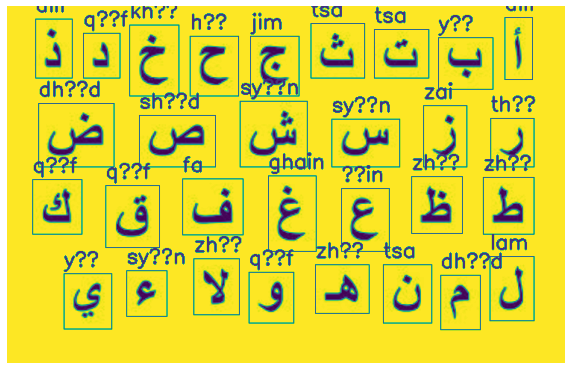

In [29]:
page = cv2.imread('/kaggle/input/alif-ba-ta/Screenshot 2024-06-16 at 16.11.18.png',cv2.IMREAD_GRAYSCALE)
characters = get_characters(page,30)[1]
for ctr in characters:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(page[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        acharacter = acharacter.reshape(32,32,1)
        pred = model.predict([[acharacter]])
        page = cv2.rectangle(page, (x, y), (x + w, y + h), (36,255,12), 1)
        cv2.putText(page, arabic_characters[np.argmax(pred)], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
plt.figure(figsize=(10,10))
plt.imshow(page)
plt.axis("OFF")
plt.show()


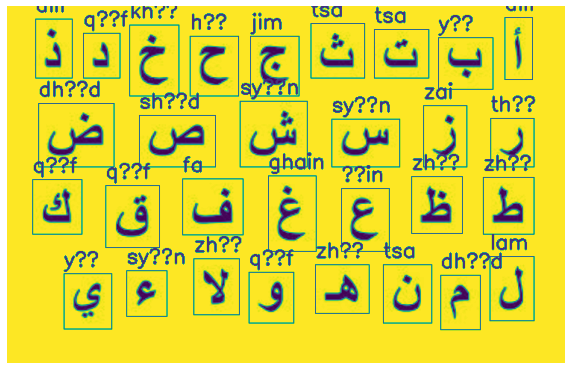

In [30]:
page = cv2.imread('/kaggle/input/alif-ba-ta/Screenshot 2024-06-16 at 16.11.18.png',cv2.IMREAD_GRAYSCALE)
characters = get_characters(page,30)[1]
for ctr in characters:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255-np.array(page[y:y+h,x:x+w])
        acharacter = preprocess(acharacter)
        acharacter = acharacter.reshape(32,32,1)
        pred = model.predict([[acharacter]])
        page = cv2.rectangle(page, (x, y), (x + w, y + h), (36,255,12), 1)
        cv2.putText(page, arabic_characters[np.argmax(pred)], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
plt.figure(figsize=(10,10))
plt.imshow(page)
plt.axis("OFF")
plt.show()


In [31]:
model.save("alifLam_3.h5")

# test with random samples

Predicted Arabic character: sîn


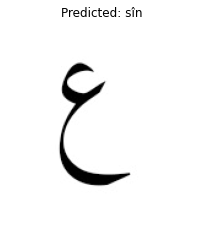

Prediction probabilities: [[3.3185173e-12 3.5115105e-12 3.7628398e-09 4.4392831e-10 2.5689599e-07
  1.3451605e-02 2.3540281e-04 5.8341418e-12 4.5172550e-11 9.3435915e-10
  1.5716847e-09 9.2910135e-01 4.9445204e-02 3.3954202e-04 4.3781786e-03
  3.7608848e-07 1.3325753e-04 2.8808889e-10 3.6993285e-08 6.2375861e-08
  1.8070989e-04 4.9786820e-05 1.1565391e-11 4.6640523e-08 3.6915595e-09
  2.6691887e-03 3.3417333e-08 1.4959981e-05]]


In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the list of Arabic characters
arabic_characters = ['alif','ba','ta','tsa','jim','hâ','khâ','dal','dzal',
                     'ra','zai','sîn','syîn','shâd','dhâd','thâ','zhâ','âin',
                     'ghain','fa','qâf','kâf','lam','mîm','nun','Ha','waw','yâ']

# Load the trained model
model = load_model('alifLam_3.h5')

def preprocess_image(image_path):
    """ Preprocess the image for prediction """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or path is incorrect")
    
    # Resize to 32x32
    img = cv2.resize(img, (32, 32))
    
    # Normalize the image
    img = img / 255.0
    
    # Reshape the image to (32, 32, 1)
    img = img.reshape(32, 32, 1)
    
    return img

def predict_character(image_path):
    """ Predict the Arabic character from an image """
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Add batch dimension
    img = np.expand_dims(img, axis=0)
    
    # Predict the label
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction, axis=1)[0]
    
    # Get the corresponding Arabic character
    predicted_character = arabic_characters[predicted_label]
    
    return predicted_character, prediction

# Example usage
image_path = '/kaggle/input/test-aliflam/tes.png'  # Provide the path to the input image
predicted_character, prediction = predict_character(image_path)
print("Predicted Arabic character:", predicted_character)

# Display the image and prediction
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f'Predicted: {predicted_character}')
plt.axis('off')
plt.show()

# Print the prediction probabilities
print("Prediction probabilities:", prediction)


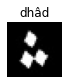

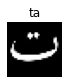

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the list of Arabic characters
arabic_characters = ['alif','ba','ta','tsa','jim','hâ','khâ','dal','dzal',
                     'ra','zai','sîn','syîn','shâd','dhâd','thâ','zhâ','âin',
                     'ghain','fa','qâf','kâf','lam','mîm','nun','Ha','waw','yâ']

# Load the trained model
model = load_model('alifLam_3.h5')

def get_sides(length):
    if length % 2 == 0:
        return length // 2, length // 2
    else:
        return (length - 1) // 2, 1 + (length - 1) // 2

def preprocess(character):
    if len(character.shape) < 2:
        character = cv2.cvtColor(character, cv2.COLOR_BGR2GRAY)

    (wt, ht) = (32, 32)
    (h, w) = character.shape
    fx = w / wt
    fy = h / ht
    f = max(fx, fy)
    newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) 
    character = cv2.resize(character, newSize)

    if character.shape[0] < 32:
        add_zeros_up = np.zeros((get_sides(32 - character.shape[0])[0], character.shape[1]))
        add_zeros_down = np.zeros((get_sides(32 - character.shape[0])[1], character.shape[1]))
        character = np.concatenate((add_zeros_up, character))
        character = np.concatenate((character, add_zeros_down))

    if character.shape[1] < 32:
        add_zeros_left = np.zeros((32, get_sides(32 - character.shape[1])[0]))
        add_zeros_right = np.zeros((32, get_sides(32 - character.shape[1])[1]))
        character = np.concatenate((add_zeros_left, character), axis=1)
        character = np.concatenate((character, add_zeros_right), axis=1)

    character = character.T / 255.0
    character = np.expand_dims(character, axis=2)
    return character

def get_characters(img, kv=5):
    gray = img.copy()

    kernel = np.ones((kv, kv), dtype=np.uint8)
    if len(img.shape) == 3:
        gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
        
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    imgdilation = cv2.dilate(thresh, kernel, iterations=1)
    ctrs, _ = cv2.findContours(imgdilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    sorted_ctrs = sorted_ctrs[::-1]
    characters = []
    for ctr in sorted_ctrs:
        x, y, w, h = cv2.boundingRect(ctr)

        acharacter = 255 - np.array(img[y:y + h, x:x + w])
        acharacter = preprocess(acharacter)
        characters.append(acharacter)
    
    return characters, sorted_ctrs

# Example usage
image_path = '/kaggle/input/test-aliflam/tes4.png'  # Provide the path to the input image

# Extract characters from the image
characters = get_characters(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), 30)[0]
characters = np.array(characters).reshape(-1, 32, 32, 1)

# Predict the characters
preds = model.predict(characters)

# Display the characters with predictions
for img, pred in zip(characters, preds):
    plt.figure(figsize=(1, 1))
    plt.imshow(img.reshape(32, 32).T, cmap='gray')
    plt.title(arabic_characters[pred.argmax()])
    plt.axis('off')
    plt.show()
